<a href="https://colab.research.google.com/github/Romneasek/Logistics-Exercise/blob/main/Logistics_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from sklearn.datasets import load_breast_cancer
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

cancer = load_breast_cancer()
df_cancer = pandas.DataFrame(cancer.data,columns=cancer.feature_names)
df_cancer['label'] = pandas.Series(cancer.target)
df_cancer.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  label  
0          0.4601                  0.11890      0  
1          0.2750                  0.08902      0  
2          0.3613                  0.08758      0  
3          0.6638                  0.17300      0  
4          0.2364                  0.07678      0  

[5 rows x 31 columns]

In [53]:
df_cancer.shape

(569, 31)

In [54]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [55]:
df_cancer.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension       label  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [56]:
miss_val = df_cancer.isnull().sum()
miss_val

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [57]:
df_cancer_corr = df_cancer.corr()
df_cancer_corr

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   
label                      -0.730029     -0.415185       -0.742636  -0.708984   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error        

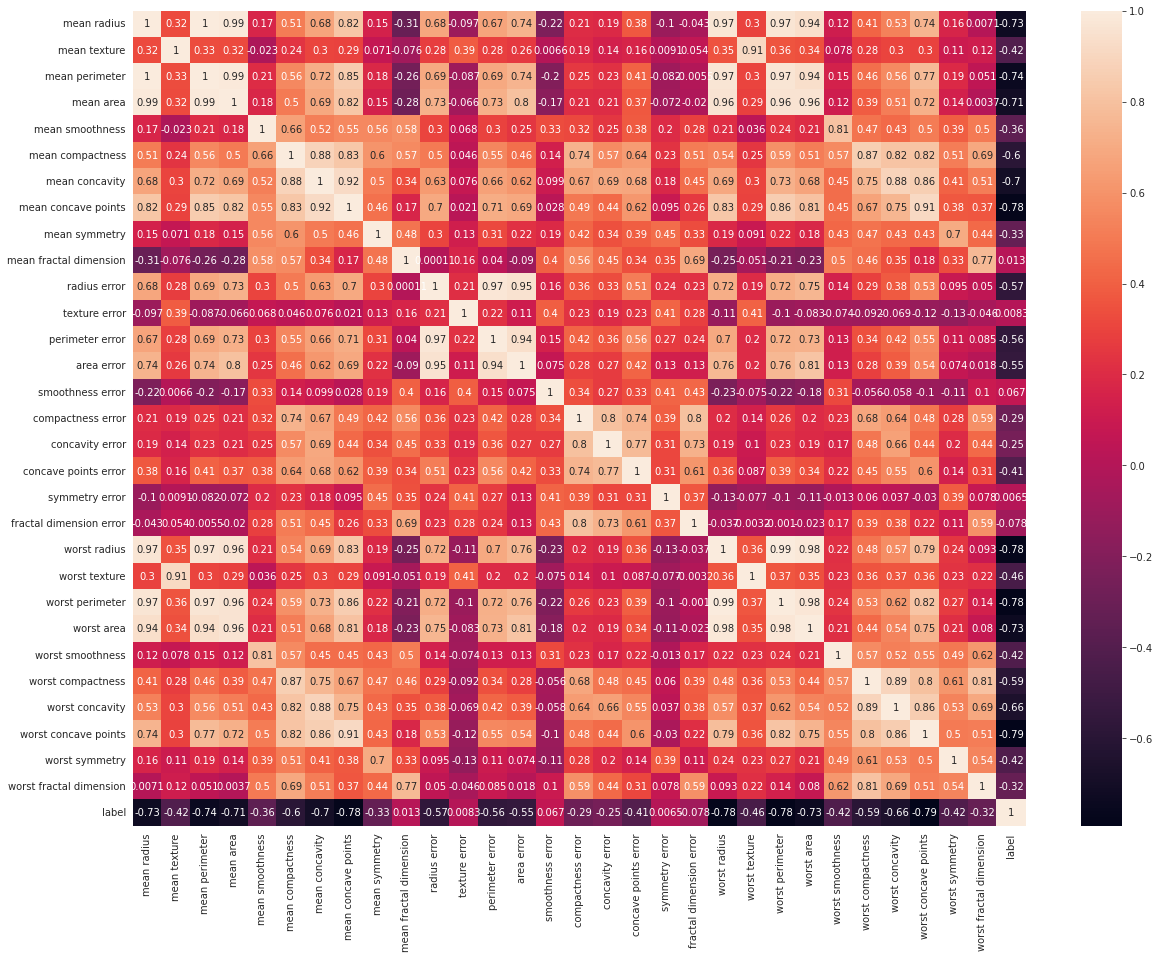

In [58]:
plt.figure(figsize=(20,15))
sns.heatmap(df_cancer_corr, annot=True)

In [59]:
#considering only the features which have absolute correlation value greater tha 0.50

df_cancer_corr = df_cancer_corr['label'][:-1]
df_cancer_corr[abs(df_cancer_corr)>=0.50].sort_values(ascending=False)


area error             -0.548236
perimeter error        -0.556141
radius error           -0.567134
worst compactness      -0.590998
mean compactness       -0.596534
worst concavity        -0.659610
mean concavity         -0.696360
mean area              -0.708984
mean radius            -0.730029
worst area             -0.733825
mean perimeter         -0.742636
worst radius           -0.776454
mean concave points    -0.776614
worst perimeter        -0.782914
worst concave points   -0.793566
Name: label, dtype: float64

In [60]:
df_cancer = df_cancer[['area error', 'perimeter error', 'radius error', 'worst compactness', 'mean compactness', 'worst concavity', 'mean concavity', 'mean area', 'mean radius', 'worst area', 'mean perimeter', 'worst radius', 'mean concave points', 'worst perimeter', 'worst concave points', 'label']]

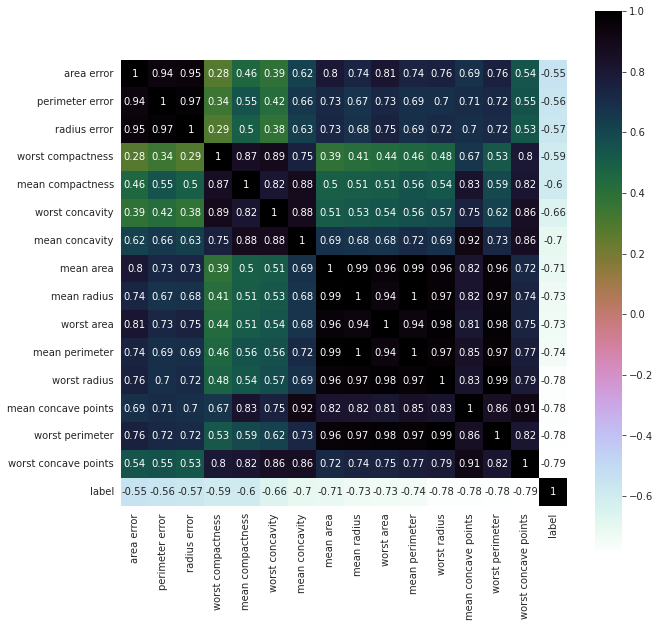

In [61]:
cancer_corr = df_cancer.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cancer_corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [62]:
# X = feature values, all the columns except the label column
x = df_cancer.iloc[:, :-1]
display(x)

# y = target values, only the label column
y = df_cancer.iloc[:, -1]
display(y)

area error  perimeter error  radius error  worst compactness  \
0        153.40            8.589        1.0950            0.66560   
1         74.08            3.398        0.5435            0.18660   
2         94.03            4.585        0.7456            0.42450   
3         27.23            3.445        0.4956            0.86630   
4         94.44            5.438        0.7572            0.20500   
..          ...              ...           ...                ...   
564      158.70            7.673        1.1760            0.21130   
565       99.04            5.203        0.7655            0.19220   
566       48.55            3.425        0.4564            0.30940   
567       86.22            5.772        0.7260            0.86810   
568       19.15            2.548        0.3857            0.06444   

     mean compactness  worst concavity  mean concavity  mean area  \
0             0.27760           0.7119         0.30010     1001.0   
1             0.07864           0.2416         0.08690     1326.0   
2             0.15990           0.4504         0.19740     1203.0   
3             0.28390           0.6869         0.24140      386.1   
4             0.13280           0.4000         0.19800     1297.0   
..                ...              ...             ...        ...   
564           0.11590           0.4107         0.24390     1479.0   
565           0.10340           0.3215         0.14400     1261.0   
566           0.10230           0.3403         0.09251      858.1   
567           0.27700           0.9387         0.35140     1265.0   
568           0.04362           0.0000         0.00000      181.0   

     mean radius  worst area  mean perimeter  worst radius  \
0          17.99      2019.0          122.80        25.380   
1          20.57      1956.0          132.90        24.990   
2          19.69      1709.0          130.00        23.570   
3          11.42       567.7           77.58        14.910   
4          20.29      1575.0          135.10        22.540   
..           ...         ...             ...           ...   
564        21.56      2027.0          142.00        25.450   
565        20.13      1731.0          131.20        23.690   
566        16.60      1124.0          108.30        18.980   
567        20.60      1821.0          140.10        25.740   
568         7.76       268.6           47.92         9.456   

     mean concave points  worst perimeter  worst concave points  
0                0.14710           184.60                0.2654  
1                0.07017           158.80                0.1860  
2                0.12790           152.50                0.2430  
3                0.10520            98.87                0.2575  
4                0.10430           152.20                0.1625  
..                   ...              ...                   ...  
564              0.13890           166.10                0.2216  
565              0.09791           155.00                0.1628  
566              0.05302           126.70                0.1418  
567              0.15200           184.60                0.2650  
568              0.00000            59.16                0.0000  

[569 rows x 15 columns]

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


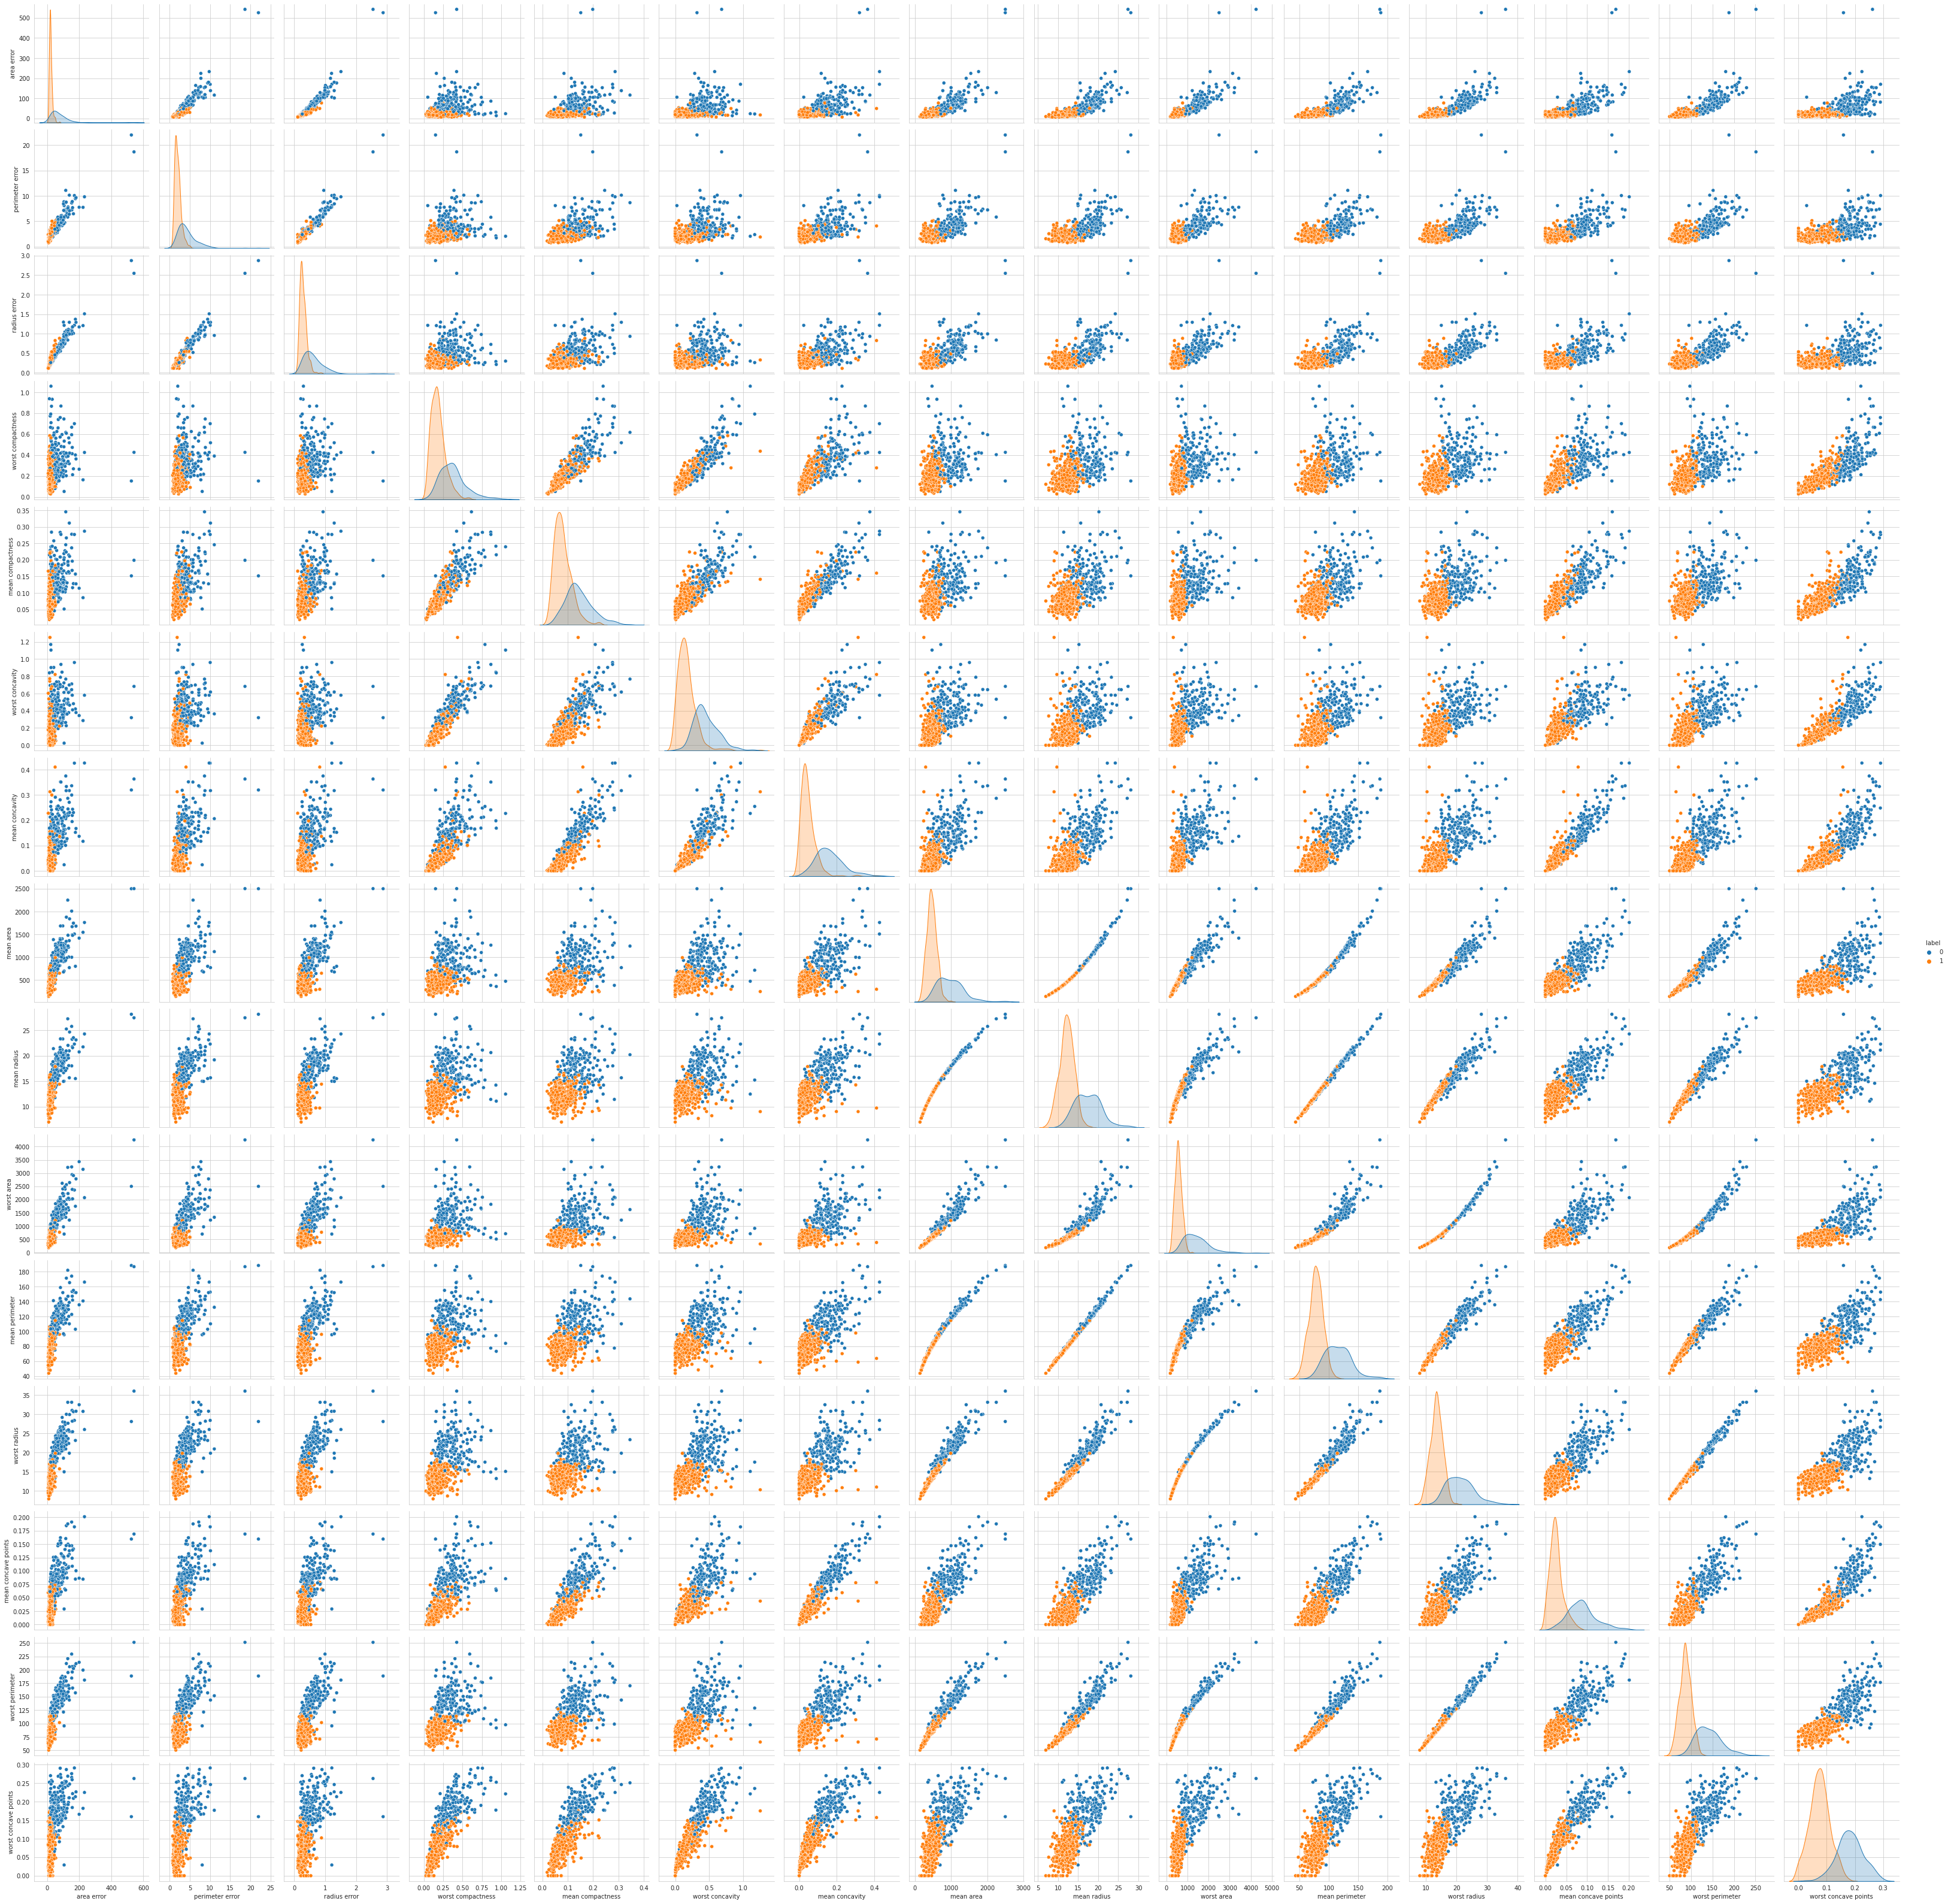

In [63]:
sns.set_style("whitegrid");
sns.pairplot(df_cancer,hue="label",size=3);
plt.show()

In [64]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [65]:
print('Dimension of x_train dataframe:',x_train.shape)
print('Dimension of y_train dataframe:',y_train.shape)
print('Dimension of x_test dataframe:',x_test.shape)
print('Dimension of y_test dataframe:',y_test.shape)

Dimension of x_train dataframe: (455, 15)
Dimension of y_train dataframe: (455,)
Dimension of x_test dataframe: (114, 15)
Dimension of y_test dataframe: (114,)


In [66]:
#Train the model
model = LogisticRegression(verbose=1)
model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [67]:
#Test the model
predictions = model.predict(x_test)
print(predictions)

[0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1
 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1
 1 0 0]


In [68]:
display(y_test.values)

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0])

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        44
           1       0.97      0.94      0.96        70

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



The accuracy of the Model 0.9473684210526315
Confusion matrix, without normalization
[[42  2]
 [ 4 66]]
Normalized confusion matrix
[[0.95454545 0.04545455]
 [0.05714286 0.94285714]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


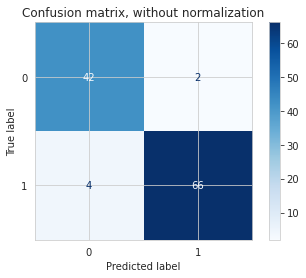

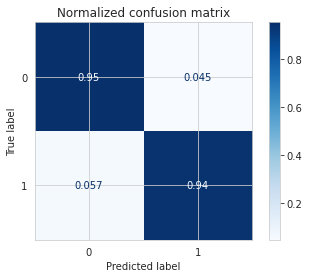

In [74]:
from sklearn.metrics import plot_confusion_matrix

print( "The accuracy of the Model",accuracy_score(y_test, predictions))

class_label_names = ['0','1']

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x_test, y_test,
                                 display_labels=class_label_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()